# Classificação clássica do dataset


## Análise Exploratória

In [270]:
''' Bibliotecas importadas '''
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [271]:
''' Importação do dataset '''  
df = pd.read_csv('alzheimer.csv')
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [272]:
''' Análise exploratória dos dados '''
df.info()
df.head()
print(f"\nValores nulos:\n{df.isnull().sum()}")

print(f"\n{'Group'}:\n{df['Group'].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB

Valores nulos:
Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

Group:
['Nondemented' 'Demented' 'Converted']


In [273]:
# Separação dos valores numéricos e categóricos para cleaning e tratamento de NaN's
numeric_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
categorical_cols = ['Group', 'M/F']

# Tratamento dos valores numéricos
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Preenchimento da coluna {col} com os valores médios {median_val}")

# Tratamento dos valores categóricos
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Preenchimento da coluna {col} com a moda dos valores '{mode_val}'")

# Nova checagem sobre valores faltantes
print('\nMissing values após tratamento:')
display(df[numeric_cols + categorical_cols].isnull().sum())

Preenchimento da coluna SES com os valores médios 2.0
Preenchimento da coluna MMSE com os valores médios 29.0

Missing values após tratamento:


/tmp/ipykernel_4776/2189618399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_4776/2189618399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
M/F      0
dtype: int64

In [274]:
# Encoding das variáveis categóricas
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


Resultado do label encoding gera:

> Group: {Converted - 0, Demented - 1, Nondemented - 2}

> Gender: {Female - 0, Male - 1}


<Axes: >

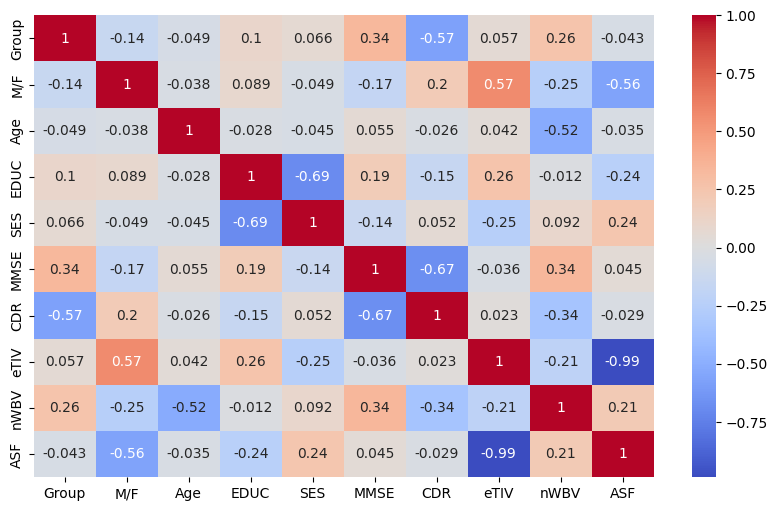

In [275]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Dados sem correlação, estão praticamente todos independentes entre si

## Aplicação de métodos de classificação

In [276]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from xgboost import XGBClassifier

scaler = StandardScaler()
numerical_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

df_orig = df.copy()
print(df_orig)

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Separação dos dados para treino e teste
y = df['Group'] 
X = df.drop('Group', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        2    1   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        2    1   88    14  2.0  30.0  0.0  2004  0.681  0.876
2        1    1   75    12  2.0  23.0  0.5  1678  0.736  1.046
3        1    1   76    12  2.0  28.0  0.5  1738  0.713  1.010
4        1    1   80    12  2.0  22.0  0.5  1698  0.701  1.034
..     ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
368      1    1   82    16  1.0  28.0  0.5  1693  0.694  1.037
369      1    1   86    16  1.0  26.0  0.5  1688  0.675  1.040
370      2    0   61    13  2.0  30.0  0.0  1319  0.801  1.331
371      2    0   63    13  2.0  30.0  0.0  1327  0.796  1.323
372      2    0   65    13  2.0  30.0  0.0  1333  0.801  1.317

[373 rows x 10 columns]


1 - Regressão Logística:

Acurácia: 0.8666666666666667
Precision: 0.8873805932629463
Recall: 0.8666666666666667
F1: 0.831447738489992


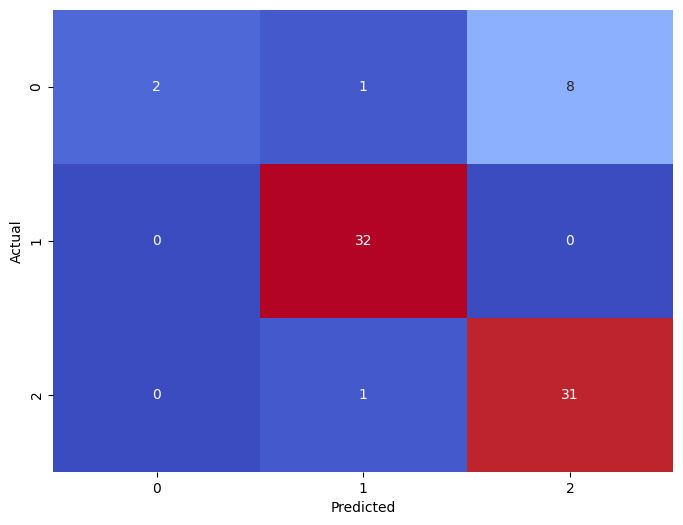

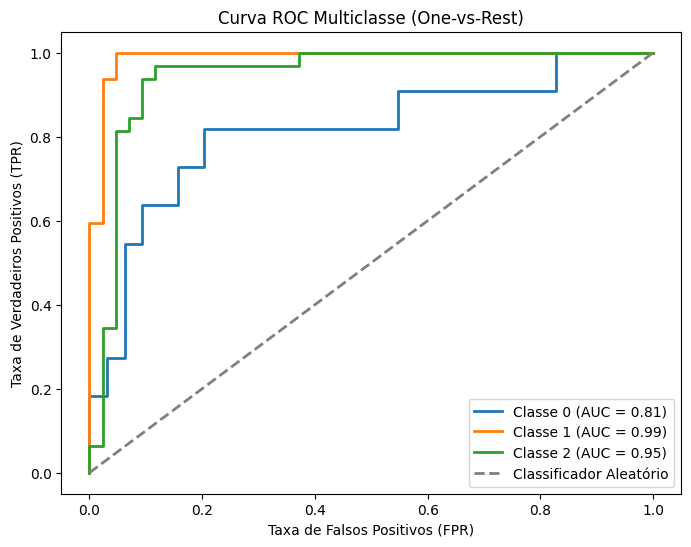

In [277]:
# Treinamento e aplicação do modelo
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted')}")
print(f"F1: {metrics.f1_score(y_test, y_pred, average='weighted')}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

n_classes = len(np.unique(y_test))  # Número de classes
y_probs = lr_model.predict_proba(X_test)  # Probabilidades para cada classe

# Calcula a curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plota a curva ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Multiclasse (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


2 - Random Forest Classifier

Acurácia: 0.8666666666666667
Precision: 0.8834034034034033
Recall: 0.8666666666666667
F1: 0.8300784750912629


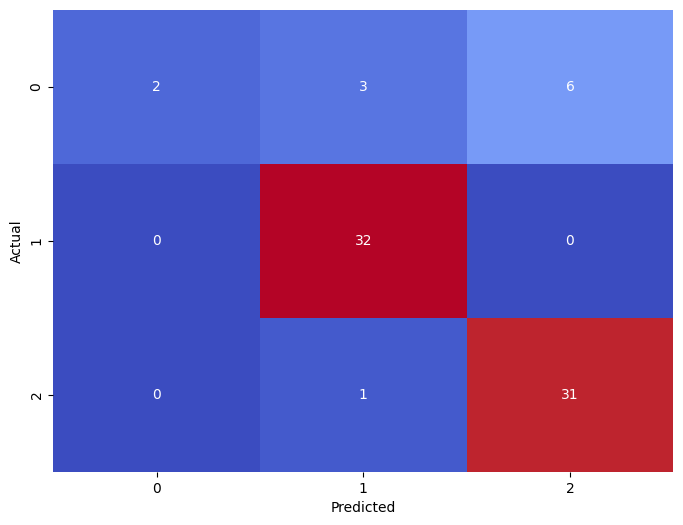

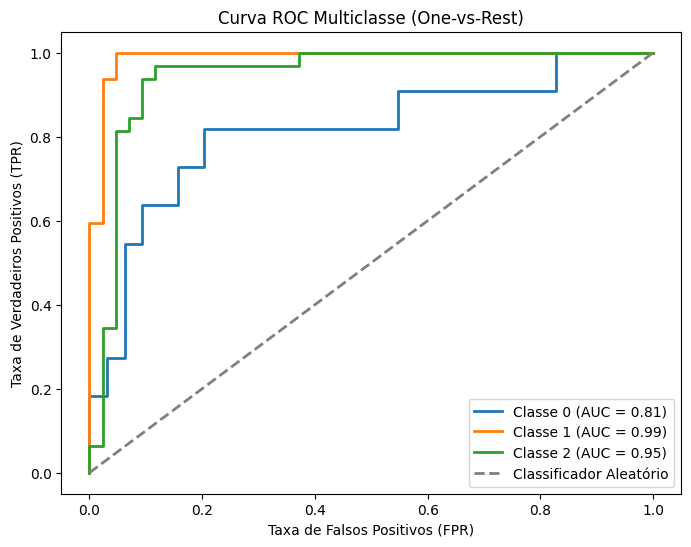

In [278]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted')}")
print(f"F1: {metrics.f1_score(y_test, y_pred, average='weighted')}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

n_classes = len(np.unique(y_test))  # Número de classes
y_probs = lr_model.predict_proba(X_test)  # Probabilidades para cada classe

# Calcula a curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plota a curva ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Multiclasse (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

3 - SVC

Acurácia: 0.8266666666666667
Precision: 0.717050061050061
Recall: 0.8266666666666667
F1: 0.7674080302711793


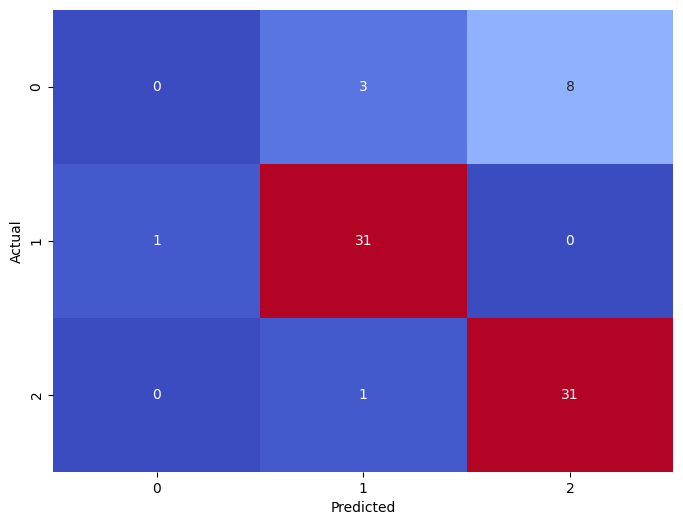

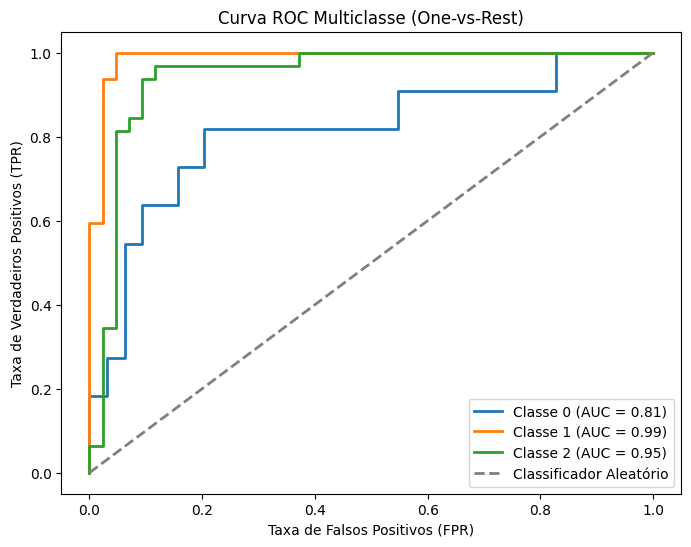

In [279]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted')}")
print(f"F1: {metrics.f1_score(y_test, y_pred, average='weighted')}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

n_classes = len(np.unique(y_test))  # Número de classes
y_probs = lr_model.predict_proba(X_test)  # Probabilidades para cada classe

# Calcula a curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plota a curva ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Multiclasse (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

4 - Gradient Boosting

Acurácia: 0.8666666666666667
Precision: 0.8834034034034033
Recall: 0.8666666666666667
F1: 0.8300784750912629


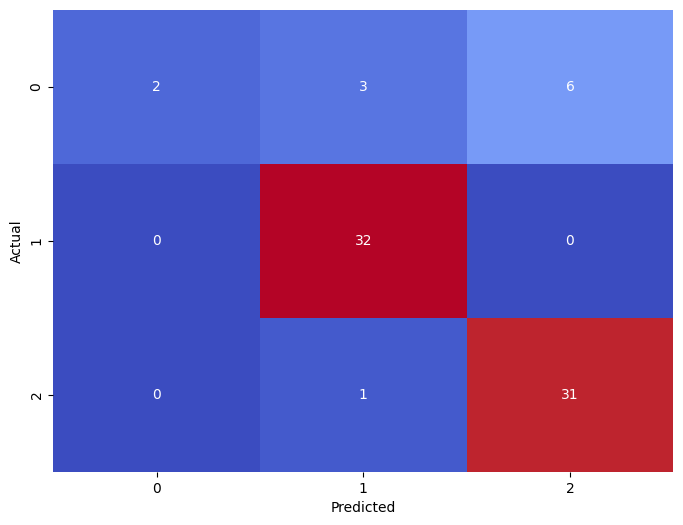

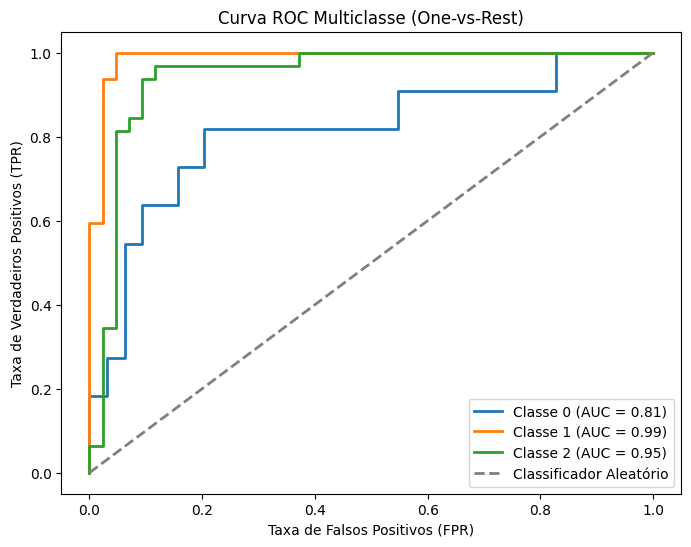

In [280]:
boost_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective="multi:softmax",
    num_class=len(y.unique()),
    random_state=42
)
boost_model.fit(X_train, y_train)
y_pred = boost_model.predict(X_test)

print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted')}")
print(f"F1: {metrics.f1_score(y_test, y_pred, average='weighted')}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

n_classes = len(np.unique(y_test))  # Número de classes
y_probs = lr_model.predict_proba(X_test)  # Probabilidades para cada classe

# Calcula a curva ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plota a curva ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Multiclasse (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

## Rede Neural

In [281]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [282]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/home/miguel/Estudo/Quantum Computing/.qml/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5215 - loss: 0.9907 - val_accuracy: 0.6500 - val_loss: 0.9094
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7661 - loss: 0.8501 - val_accuracy: 0.8500 - val_loss: 0.7603
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8531 - loss: 0.7422 - val_accuracy: 0.8500 - val_loss: 0.6522
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8741 - loss: 0.6395 - val_accuracy: 0.8500 - val_loss: 0.5659
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8433 - loss: 0.5872 - val_accuracy: 0.8500 - val_loss: 0.4963
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8710 - loss: 0.5380 - val_accuracy: 0.8667 - val_loss: 0.4440
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9179 - loss: 0.4132 - val_accuracy: 0.8667 - val_loss: 0.4054
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9323 - loss: 0.3435 - val_accuracy: 0.8833 - val_loss: 0.3749
Epoch 9/50


In [283]:
def symbolic_rules(row):
    if row['MMSE'] < 24:
        return 2
    if row['CDR'] > 0.5:
        return 1
    if row['Age'] > 65 and row['MMSE'] < 20:
        return 1
    if row['nWBV'] < 0.7 and row['ASF'] > 1.1:
        return 1
    return 2

In [ ]:
def neuro_diagnosis(row, neural_model):
    neural_pred = neural_model.predict(row.values.reshape(1, -1)) # (row.values.reshape(1, -1))[0][0]
    neural_diagnosis = np.argmax(neural_pred)
    print(f"Diagnóstico neural: {neural_diagnosis}")
    return neural_diagnosis

def symbolic_diagnosis(row):
    symbolic_diagnosis = symbolic_rules(row)
    print(f"Diagnóstico simbólico: {symbolic_diagnosis}")
    return symbolic_diagnosis

def ensemble_diagnosis(results_neuro_sample, results_symbolic_sample):
    if results_neuro_sample == results_symbolic_sample:
        return results_symbolic_sample
    return results_neuro_sample

In [294]:
y2 = df_orig['Group'] 
X2 = df_orig.drop('Group', axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

results_neuro = X_test.apply(lambda row: neuro_diagnosis(row, model), axis=1)
results_symbolic = X_test2.apply(lambda row: symbolic_diagnosis(row), axis=1)

results_neuro = results_neuro.dropna()
results_symbolic = results_symbolic.dropna()

y_pred = []

print(f"Resultados neurais: {results_neuro}")
print(f"Resultados simbólicos: {results_symbolic}")

results_symbolic = results_symbolic.reindex(results_neuro.index)

for idx in results_neuro.index:
    y_pred.append(ensemble_diagnosis(results_neuro[idx], results_symbolic[idx]))    

# Avaliação do modelo ensemble
print(f"Valor das métricas do classification_report:\n{metrics.classification_report(y_test, y_pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Diagnóstico neural: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Diagnóstico neural: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Diagnóstico neural: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Di

Text(70.72222222222221, 0.5, 'Actual')

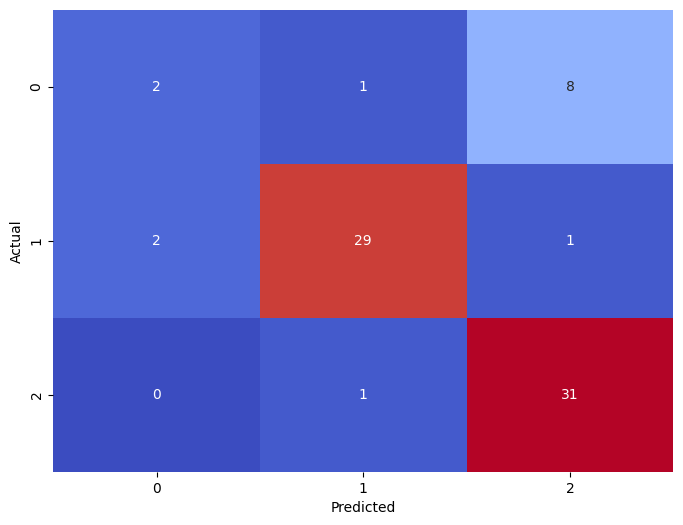

In [298]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')